<a href="https://colab.research.google.com/github/Ninja-draw-coder/PythonProjects/blob/main/Travel_Aggregator_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Travel Aggregator Analysis
 "Travelling has significantly changed thanks to technology. In the earlier days, it was not
easy to travel as booking journeys used to be a hassle, where people needed to contact
travel agents, get prices and then do a lot of paperwork.
But, with the advent of online apps, it becomes easier to book tickets. However, one
challenge is still there. Due to many available apps which offer bookings, there can be a lot
of comparisons for getting the best price.
A new Indian start-up, "MyNextBooking” is an aggregator on top of the available top
platforms (Yatra, MMT, Goibibo). It helps the user compare prices for their upcoming
journeys on its platform and the customer is redirected to the desired platform after
looking at the price.
However, they need to do a lot of analysis of the data which they have collected over a
while.
As a newly hired analyst and proficiency in Python, your role is to help them perform an indepth analysis."

Q.1 Find the number of distinct bookings, sessions, and searches from the given data sets

In [ ]:
#To find the number of distinct bookings, sessions, and searches using Python with pandas, you'll need to read both CSV files and use the nunique() method.
import pandas as pd

# Load CSVs
df_bookings = pd.read_csv('Bookings.csv')
#print(df_bookings.head())
df_sessions = pd.read_csv('Sessions.csv')
#df_sessions.head()

#number fo distinct bookings
# printing the unique values present in the booking column
print("Printing the unique values present in the booking column",df_bookings['booking_id'].nunique())


#number fo distinct sessions
# printing the unique values present in the session column
print("Printing the unique values present in the sessions column",df_sessions['session_id'].nunique())

#number fo distinct searches
# printing the unique values present in the search column
print("Printing the unique values present in the search column",df_sessions['search_id'].nunique())


Printing the unique values present in the booking column 339
Printing the unique values present in the sessions column 331
Printing the unique values present in the search column 1360


Q.2 How many sessions have more than one booking?


In [ ]:
#How many sessions have more than one booking?
# Drop null bookings (if some sessions didn’t lead to bookings)
filtered_df = df_sessions.dropna(subset=['booking_id'])

# Count unique bookings per session
booking_counts = filtered_df.groupby('session_id')['booking_id'].nunique()

# Filter sessions with more than one booking
sessions_with_multiple_bookings = booking_counts[booking_counts > 1]

# Output count
print(f"Number of sessions with more than one booking: {len(sessions_with_multiple_bookings)}")


session_id
session_0      1
session_1      1
session_10     1
session_100    1
session_101    1
              ..
session_95     1
session_96     1
session_97     1
session_98     1
session_99     1
Name: booking_id, Length: 329, dtype: int64
Number of sessions with more than one booking: 10


Q.3 Which days of the week have the highest number of bookings? Also, draw a pie
chart to show the distribution for all days of the week?


Day with the highest number of bookings: Thursday
booking_day
Friday       51
Monday       51
Saturday     44
Sunday       35
Thursday     65
Tuesday      59
Wednesday    34
Name: count, dtype: int64


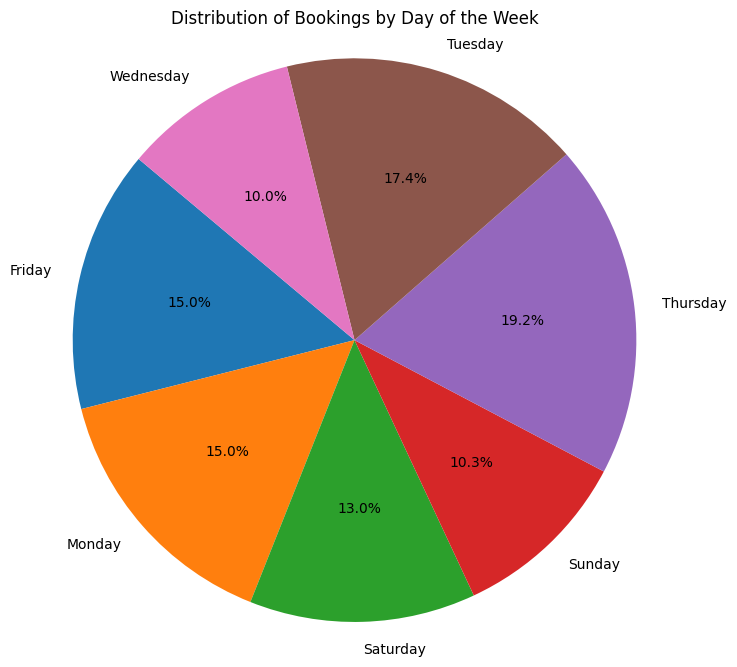

In [ ]:
#Which days of the week have the highest number of bookings?
# Also, draw a pie chart to show the distribution for all days of the week?
import pandas as pd
import matplotlib.pyplot as plt

# Load bookings dataset
booking_df = pd.read_csv("Bookings.csv")

# Convert 'booking_time' to datetime
booking_df['booking_time'] = pd.to_datetime(booking_df['booking_time'])

# Extract day of the week (e.g., Monday, Tuesday)
booking_df['booking_day'] = booking_df['booking_time'].dt.day_name()

# Count bookings per day
day_counts = booking_df['booking_day'].value_counts().sort_index()  # sort for consistent pie chart order

# Display the most frequent booking day(s)
most_bookings_day = day_counts.idxmax()
print(f"Day with the highest number of bookings: {most_bookings_day}")
print(day_counts)

#plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(day_counts, labels=day_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Bookings by Day of the Week')
plt.axis('equal')  # Equal aspect ratio ensures the pie is a circle.
plt.show()


Q.4  For each of the service names, display the total number of bookings and the total Gross Booking Value in INR.

In [ ]:
# Step 2: Group the data by service name
grouped_data = df_bookings.groupby('service_name')

# Step 3: Get total number of bookings for each service
total_bookings = grouped_data['booking_id'].count()

# Step 4: Get total Gross Booking Value (INR) for each service
total_gbv = grouped_data['INR_Amount'].sum()

# Step 5: Combine both results into a summary DataFrame
summary = pd.DataFrame({
    'Total Bookings': total_bookings,
    'Total Gross Booking Value (INR)': total_gbv
})

# Step 6: Display the result
print(summary)

              Total Bookings  Total Gross Booking Value (INR)
service_name                                                 
GOIBIBO                  186                       5897637.97
MMT                       48                        665669.08
YATRA                    105                       3378702.13


Q. 5 For customers who have more than 1 booking, which is the most booked route
(from_city to to_city)?

In [ ]:
#For customers who have more than 1 booking, which is the most booked route (from_city to to_city)?
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the data
df_bookings = pd.read_csv('Bookings.csv')

'''customerbookings = df_bookings.groupby('customer_id').filter(lambda x: len(x) > 1)
route_counts = customerbookings.groupby(['from_city', 'to_city']).size().reset_index(name='count')
most_booked_route = route_counts.loc[route_counts['count'].idxmax()]
print(f"The most booked route is from {most_booked_route['from_city']} to {most_booked_route['to_city']} with {most_booked_route['count']} bookings.")
'''
# Step 2: Group by customer_id and count booking_ids
customer_booking_counts = df_bookings.groupby('customer_id')['booking_id'].count()

# Step 3: Filter customers who have more than 1 booking
multi_booking_customers = customer_booking_counts[customer_booking_counts > 1].index

# Step 4: Filter the main data to include only these customers
multi_booking_data = df_bookings[df_bookings['customer_id'].isin(multi_booking_customers)]

# Step 5: Create a new 'route' column
multi_booking_data = multi_booking_data.copy()  # avoid SettingWithCopyWarning
multi_booking_data['route'] = multi_booking_data['from_city'] + " ➔ " + multi_booking_data['to_city']

# Step 6: Group by 'route' and count how many times each route was booked
route_counts = multi_booking_data.groupby('route')['booking_id'].count()

# Step 7: Find the route with the maximum bookings
most_common_route = route_counts.idxmax()
most_common_route_count = route_counts.max()

# Step 8: Display the result
print(f"The most booked route among customers with multiple bookings is: {most_common_route}")
print(f"Number of times this route was booked: {most_common_route_count}")

The most booked route among customers with multiple bookings is: Gurgaon ➔ Roissy-en-France
Number of times this route was booked: 5


Which are the top 3 departure cities from where customers book mostly in advance,
provided that there have been at least 5 departures from that city?

In [ ]:
import pandas as pd

# Step 1: Load the data
data = pd.read_csv("Bookings.csv")  # Replace with your filename

# Step 2: Group by 'from_city'
city_group = data.groupby('from_city')

# Step 3: For each city, calculate:
# - total departures (count of bookings)
# - average days to departure
city_stats = city_group.agg(
    total_departures=('booking_id', 'count'),
    avg_days_to_departure=('days_to_departure', 'mean')
).reset_index()

# Step 4: Filter only cities with at least 5 departures
city_stats_filtered = city_stats[city_stats['total_departures'] >= 5]

# Step 5: Sort by highest average days to departure
top_cities = city_stats_filtered.sort_values(by='avg_days_to_departure', ascending=False)

# Step 6: Display the top 3 cities
print("Top 3 departure cities where customers book mostly in advance:")
print(top_cities)

Top 3 departure cities where customers book mostly in advance:
      from_city  total_departures  avg_days_to_departure
7       Bālāpur                 6              46.166667
11   Devanhalli                24              29.583333
8       Chennai                16              26.187500
16      Gurgaon               136              26.176471
27       Mumbai                34              21.764706
29    New Delhi                 7              21.285714
25  Madhyamgram                 6              15.000000
10        Delhi                29              12.758621
1     Ahmedabad                 8              11.750000
33   Rāja Sānsi                17               8.823529


In [ ]:
#Which are the top 3 departure cities from where customers book mostly in advance,provided that there have been at least 5 departures from that city?
df_departurecity = df_bookings.groupby('from_city')['booking_id'].count().reset_index()
df_departurecity.columns = ['from_city', 'count']

df_departurecity = df_departurecity[df_departurecity['count'] >= 5].sort_values(by='count', ascending=False)
#df_departurecity = df_departurecity.sort_values(by='count', ascending=False)
print(df_departurecity)

# Step 4: Filter the main data to include only these cities
multi_booking_data = df_bookings[df_bookings['from_city'].isin(df_departurecity['from_city'])]
#print(multi_booking_data)

#Now filter data for advance bookings where days of departure is greater then 0
df_advance = multi_booking_data[multi_booking_data['days_to_departure'] > 0]
print(df_advance.head())

#top 3 departure cities from where customers book mostly in advance
df_advance_departurecity  = df_advance.groupby('from_city')['booking_id'].count().reset_index()
print(df_advance_departurecity)
df_advance_departurecity = df_advance_departurecity.sort_values(by='booking_id', ascending=False)
print(df_advance_departurecity.head(3))


      from_city  count
16      Gurgaon    136
27       Mumbai     34
10        Delhi     29
11   Devanhalli     24
33   Rāja Sānsi     17
8       Chennai     16
1     Ahmedabad      8
29    New Delhi      7
7       Bālāpur      6
25  Madhyamgram      6
    customer_id   booking_id   from_city from_country            to_city  \
0  customer_259   booking_82     Gurgaon        India          Ahmedabad   
1  customer_303  booking_156       Delhi        India           Brussels   
2  customer_203   booking_99  Devanhalli        India  Frankfurt am Main   
3  customer_211  booking_319     Gurgaon        India  Frankfurt am Main   
4  customer_287  booking_222     Gurgaon        India   Roissy-en-France   

  to_country          booking_time device_type_used  INR_Amount service_name  \
0      India  2020-02-05T16:12:08Z          Desktop     2565.28          MMT   
1    Belgium  2018-11-21T08:21:47Z          Android    23120.00        YATRA   
2    Germany  2019-12-16T22:54:58Z          Androi

Plot a heatmap displaying correlations of the numerical column and report which
pair of numerical columns in the bookings data set, have the maximum correlation?

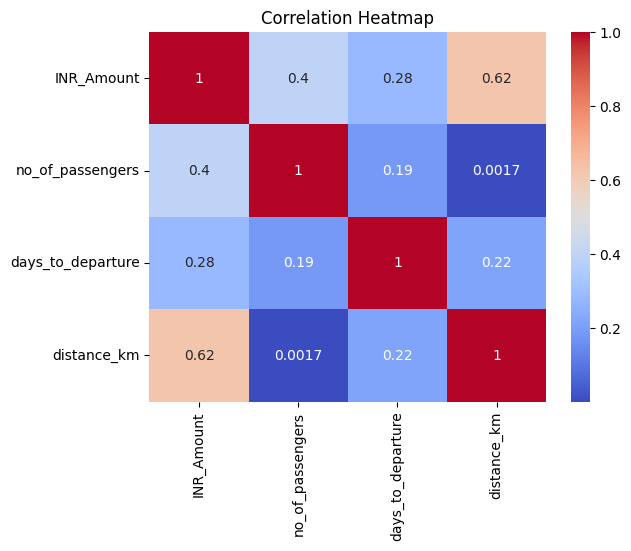

In [ ]:
#Plot a heatmap displaying correlations of the numerical column and report which
#pair of numerical columns in the bookings data set, have the maximum correlation?
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load the data
data_booking = pd.read_csv("Bookings.csv")  # Replace with your filename
selected_columns = ['INR_Amount','no_of_passengers','days_to_departure','distance_km']
sns.heatmap(data_booking[selected_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()
#dataset with maxiumum corelation


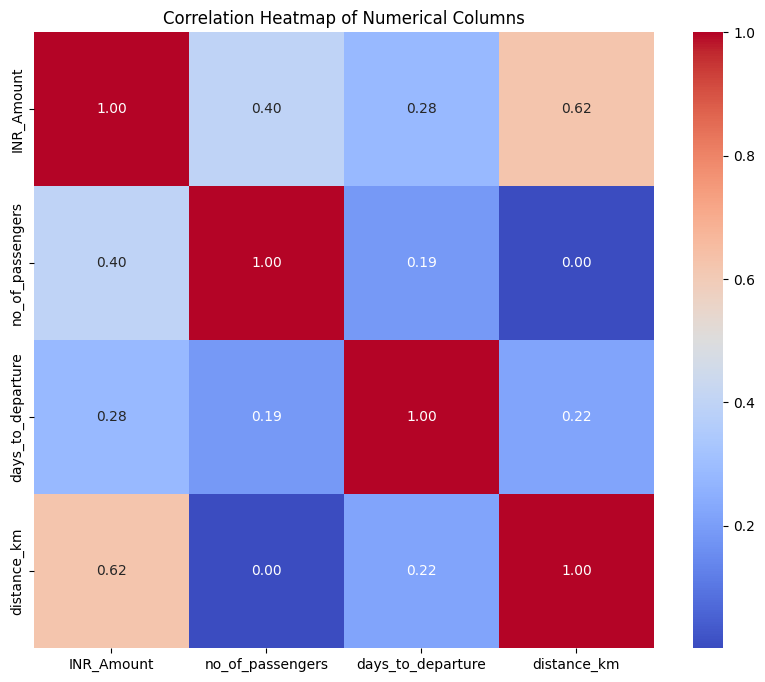

The pair of columns with the maximum correlation is: ('INR_Amount', 'distance_km')
The correlation value is: 0.62


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Load the data
data = pd.read_csv("Bookings.csv")  # Replace with your filename

# Step 2: Select only numerical columns
numerical_data = data.select_dtypes(include=['float64', 'int64'])

# Step 3: Calculate the correlation matrix
correlation_matrix = numerical_data.corr()

# Step 4: Plot the heatmap
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()

# Step 5: Find the pair with maximum correlation (excluding self-correlation)
# Stack the correlation matrix and reset the index
correlation_pairs = correlation_matrix.where(~np.eye(correlation_matrix.shape[0],dtype=bool)).stack()

# Find the pair with the maximum correlation
max_corr_pair = correlation_pairs.idxmax()
max_corr_value = correlation_pairs.max()

# Step 6: Display the result
print(f"The pair of columns with the maximum correlation is: {max_corr_pair}")
print(f"The correlation value is: {max_corr_value:.2f}")

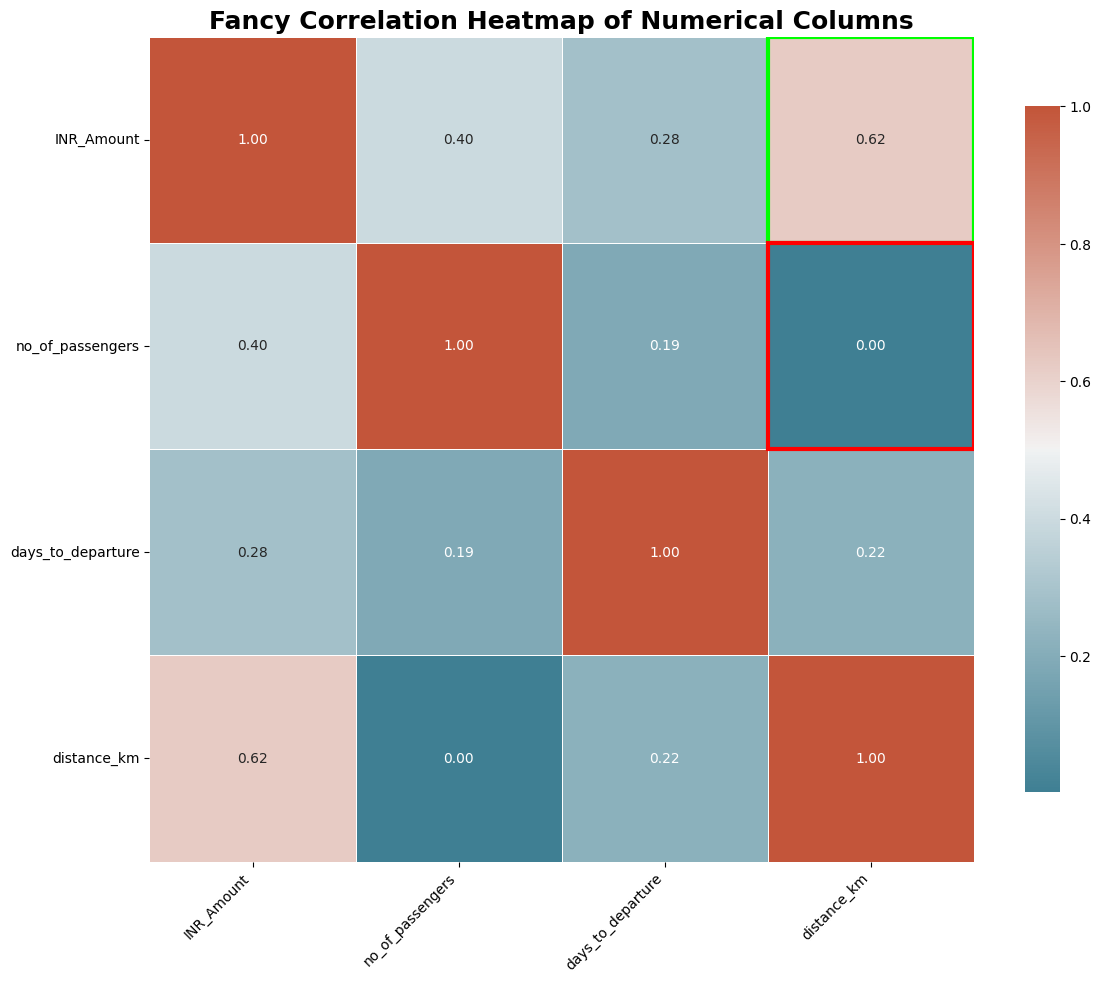

🔵 Maximum correlation: 0.62 between ('INR_Amount', 'distance_km')
🔴 Minimum correlation: 0.00 between ('no_of_passengers', 'distance_km')


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load the data
data = pd.read_csv("Bookings.csv")  # Replace with your filename

# Step 2: Select only numerical columns
numerical_data = data.select_dtypes(include=['float64', 'int64'])

# Step 3: Calculate the correlation matrix
correlation_matrix = numerical_data.corr()

# Step 4: Find max and min correlations (excluding diagonal 1.0)
corr_matrix_no_diag = correlation_matrix.where(~np.eye(correlation_matrix.shape[0], dtype=bool))
max_corr = corr_matrix_no_diag.max().max()
min_corr = corr_matrix_no_diag.min().min()

max_pair = corr_matrix_no_diag.stack().idxmax()
min_pair = corr_matrix_no_diag.stack().idxmin()

# Step 5: Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Step 6: Create a diverging colormap
cmap = sns.diverging_palette(220, 20, as_cmap=True)

# Step 7: Plot the heatmap
sns.heatmap(correlation_matrix,
            cmap=cmap,
            annot=True,
            fmt=".2f",
            linewidths=0.7,
            cbar_kws={"shrink": 0.8},
            square=True)

# Step 8: Highlight the max and min correlation pairs
for (row, col), val in np.ndenumerate(correlation_matrix.values):
    if (correlation_matrix.index[row], correlation_matrix.columns[col]) == max_pair:
        plt.gca().add_patch(plt.Rectangle((col, row), 1, 1, fill=False, edgecolor='lime', lw=3))
    if (correlation_matrix.index[row], correlation_matrix.columns[col]) == min_pair:
        plt.gca().add_patch(plt.Rectangle((col, row), 1, 1, fill=False, edgecolor='red', lw=3))

# Step 9: Titles and labels
plt.title('Correlation Heatmap of Numerical Columns', fontsize=18, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

# Step 10: Show the plot
plt.show()

# Step 11: Print the strongest and weakest relationships
print(f"🔵 Maximum correlation: {max_corr:.2f} between {max_pair}")
print(f"🔴 Minimum correlation: {min_corr:.2f} between {min_pair}")

For each service, which is the most used device type for making bookings on the
platform?


In [4]:
# For each service, which is the most used device type for making bookings on the platform?
import pandas as pd
df_bookings = pd.read_csv('Bookings.csv')

df_servicename = df_bookings.groupby('service_name')
print(df_servicename)
df_devicetype = df_servicename['device_type_used'].value_counts()

df_devicetype = df_devicetype.groupby(level=0).nlargest(1)
print(df_devicetype)

service_device_counts = df_bookings.groupby(['service_name', 'device_type_used']).size().reset_index(name='count')
most_used_devices = service_device_counts.loc[service_device_counts.groupby('service_name')['count'].idxmax()]

print("\n Most used device type for each service:")
print(most_used_devices[['service_name', 'device_type_used', 'count']])

service_name  service_name  device_type_used
GOIBIBO       GOIBIBO       IOS                 70
MMT           MMT           Desktop             30
YATRA         YATRA         Desktop             51
Name: count, dtype: int64

8) Most used device type for each service:
  service_name device_type_used  count
2      GOIBIBO              IOS     70
5          MMT          Desktop     30
9        YATRA          Desktop     51


Plot the trends at a quarterly frequency for the number of bookings by each of the
device types, that is, plot a time series for each year and quarter showing the
number of bookings performed by each device type.

<ipython-input-5-8590c6d5e400>:9: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df_bookings['quarter'] = df_bookings['booking_time'].dt.to_period('Q')


<Figure size 1200x600 with 0 Axes>

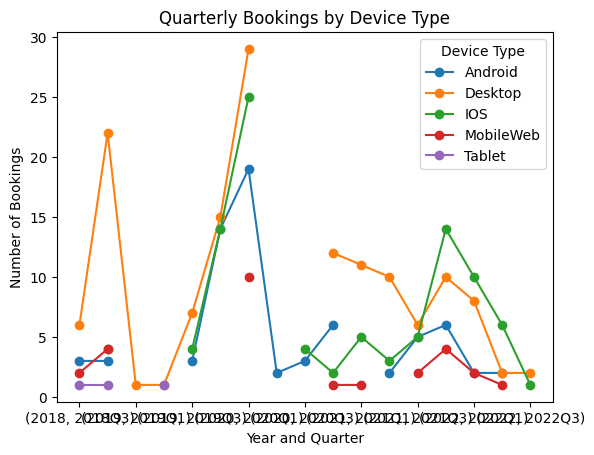

In [5]:
#Plot the trends at a quarterly frequency for the number of bookings by each of the device types, that is, plot a time series for each year and quarter showing the
#number of bookings performed by each device type.
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df_bookings = pd.read_csv('Bookings.csv')
df_bookings['booking_time'] = pd.to_datetime(df_bookings['booking_time'])
df_bookings['quarter'] = df_bookings['booking_time'].dt.to_period('Q')
df_bookings['year'] = df_bookings['booking_time'].dt.year

# Group by quarter and device type, then count bookings
device_type_counts = df_bookings.groupby(['year', 'quarter', 'device_type_used']).size().reset_index(name='count')
device_type_counts = device_type_counts.pivot_table(index=['year', 'quarter'], columns='device_type_used', values='count')
plt.figure(figsize=(12, 6))
device_type_counts.plot(kind='line', marker='o')
plt.title('Quarterly Bookings by Device Type')
plt.xlabel('Year and Quarter')
plt.ylabel('Number of Bookings')
plt.legend(title='Device Type')
plt.show()


In [6]:
 #9) Quarterly trends for bookings by device type
quarterly_device_bookings = df_bookings.groupby(['booking_year_quarter', 'device_type_used']).size().reset_index(name='bookings')

plt.figure(figsize=(14, 8))
for device in quarterly_device_bookings['device_type_used'].unique():
    device_data = quarterly_device_bookings[quarterly_device_bookings['device_type_used'] == device]
    plt.plot(device_data['booking_year_quarter'], device_data['bookings'], marker='o', label=device)

plt.title('Quarterly Booking Trends by Device Type')
plt.xlabel('Year-Quarter')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('quarterly_device_trends.png')
plt.close()

KeyError: 'booking_year_quarter'

In [ ]:
# 10) Overall Booking to Search Ratio (oBSR) Analysis
# Merge bookings and sessions data to calculate oBSR
sessions_df_with_search = sessions_df.dropna(subset=['search_id'])
sessions_df_with_booking = sessions_df.dropna(subset=['booking_id'])

# Extract date from search_time
sessions_df_with_search['search_date'] = sessions_df_with_search['search_time'].dt.date
sessions_df_with_booking['booking_date'] = sessions_df_with_booking['search_time'].dt.date

# Count searches and bookings per day
daily_searches = sessions_df_with_search.groupby('search_date').size().reset_index(name='searches')
daily_bookings = sessions_df_with_booking.groupby('booking_date').size().reset_index(name='bookings')

# Merge to get searches and bookings on the same days
daily_metrics = pd.merge(daily_searches, daily_bookings, left_on='search_date', right_on='booking_date', how='left')
daily_metrics.fillna(0, inplace=True)  # Fill days with no bookings

# Calculate oBSR
daily_metrics['oBSR'] = daily_metrics['bookings'] / daily_metrics['searches']

# Add date components for analysis
daily_metrics['date'] = pd.to_datetime(daily_metrics['search_date'])
daily_metrics['month'] = daily_metrics['date'].dt.month
daily_metrics['month_name'] = daily_metrics['date'].dt.month_name()
daily_metrics['day_of_week'] = daily_metrics['date'].dt.day_name()

# Average oBSR by month
monthly_obsr = daily_metrics.groupby('month_name')['oBSR'].mean().reindex(calendar.month_name[1:])

print("\n10) Booking to Search Ratio (oBSR) Analysis:")
print("Average oBSR by month:")
print(monthly_obsr)

# Average oBSR by day of week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_obsr = daily_metrics.groupby('day_of_week')['oBSR'].mean().reindex(day_order)

print("\nAverage oBSR by day of week:")
print(daily_obsr)

# Plot time series of oBSR
plt.figure(figsize=(14, 8))
plt.plot(daily_metrics['date'], daily_metrics['oBSR'], marker='.', linestyle='-')
plt.title('Overall Booking to Search Ratio (oBSR) Time Series')
plt.xlabel('Date')
plt.ylabel('oBSR')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('obsr_time_series.png')
plt.close()

print("\nAnalysis completed successfully. Visualization files have been saved.")